# Tic Tac Toe Machine using Voodoo Quantum

A qiskit implementation of the classic game of Tic Tac Toe using quantum simulators which can be migrated to run on quantum computers.

In [81]:
# importing Qiskit
from qiskit import Aer, execute
from qiskit import QuantumCircuit

#importing the Oracle circuit builder
from qiskit.circuit.library import PhaseOracle

# import basic plot tools
from qiskit.visualization import plot_histogram

### Initialization
We start with initializing the qubits with all states having equal amplitudes using Hadamard Gates.

In [82]:
def initialize_s(qc, n):
    for q in list(range(n)):
        qc.h(q)

### Diffuser
Grovers algorithm works by applying an Oracle reflection and a diffuser amplitude amplification around $\sqrt{n}$ times to search for a particular state.<br>
We define the diffuser function here which amplifies the negated state that the Oracle has prepared.

In [83]:
# Multicontrolled z-gate subroutine that applies the gate to the circuit based on the control and target qubits
def multicontrolled_z(qc, control, target):
    qc.h(target)
    qc.mct(control, target)
    qc.h(target)

# Actual diffuser function that applies the diffuser to the circuit
def diffuser(qc):
    for qubit in range(10):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, list(range(9)), 9)

    for qubit in range(10):
        qc.x(qubit)
        qc.h(qubit)

### Oracle and the completed circuit
We continue to build the Oracle using the PhaseOracle method, using the winning clause expressions to determine the winning state.<br>
All these pieces are finally put together to run the Grover's algorithm 3 times(since we use 9 qubits, 1 for each space on the board)

In [84]:
circuit = QuantumCircuit(10, 10)

# Expression defining all the winning states
expression = '(x1 & x2 & x3) ^ (y1 & y2 & y3) ^ (z1 & z2 & z3) ^ (x1 & y1 & z1) ^ (x2 & y2 & z2) ^ (x3 & y3 & z3) ^ (x1 & y2 & z3) ^ (x3 & y2 & z1)'

initialize_s(circuit, 10)

for i in range(3):
    circuit.barrier(list(range(10)))

    circuit.append(PhaseOracle(expression), list(range(9)))

    circuit.barrier(list(range(10)))

    diffuser(circuit)


# Output
circuit.measure(list(range(9)), list(range(9)))
#circuit.measure([9], [8])

The circuit used for this algorithm is drawn below.

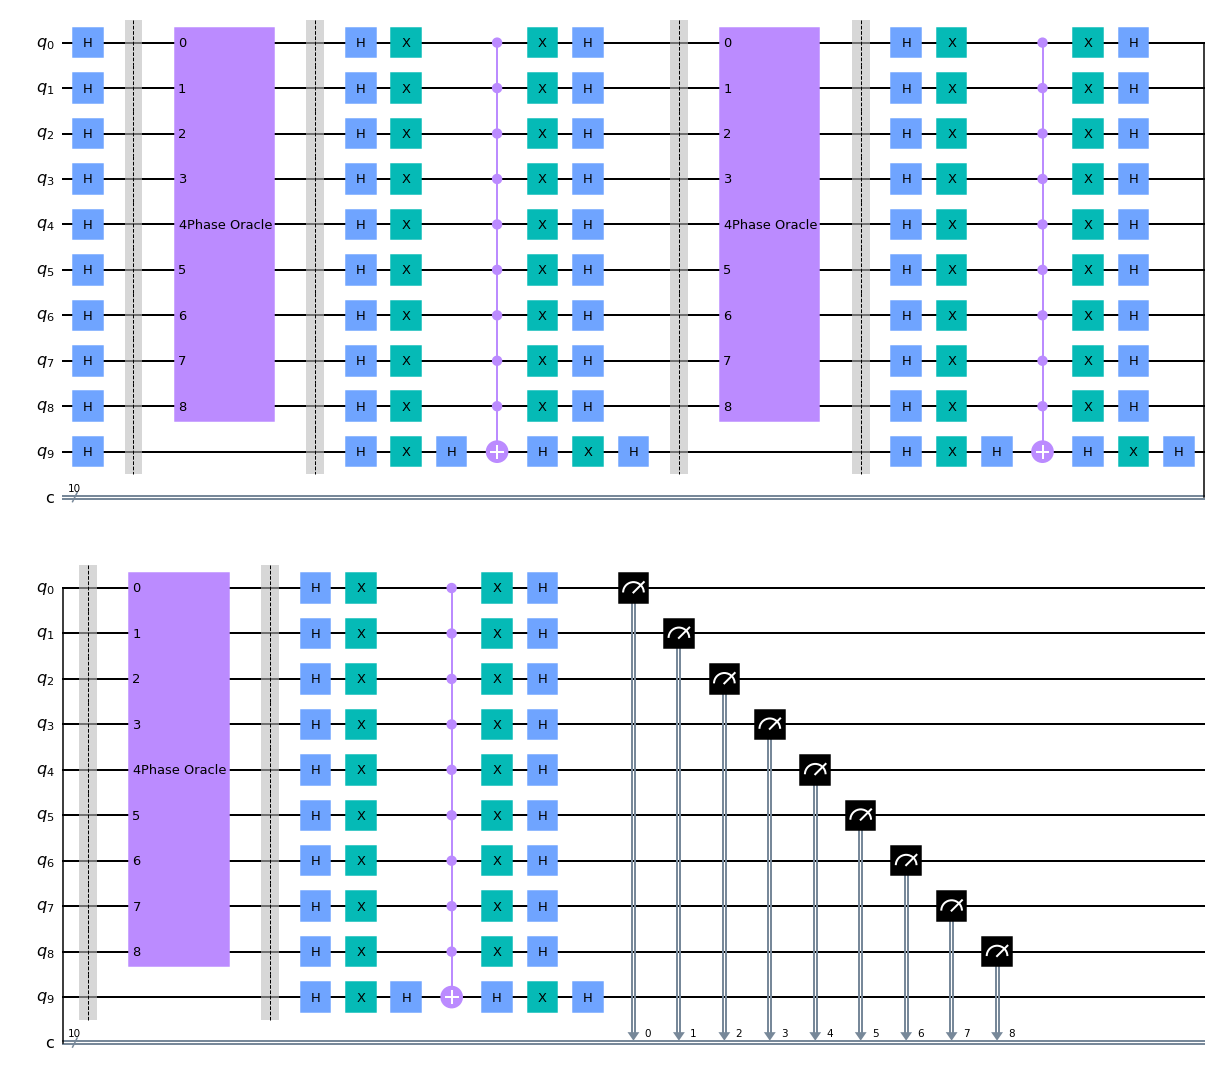

In [85]:
circuit.draw(output='mpl')

### Output
We finally run the quantum circuit on the "aer_simulator" provided by qiskit to simulate a quantum circuit and observe the output using histograms.

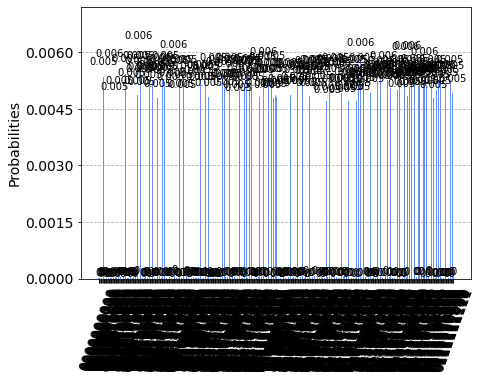

In [86]:
N = 100000  #Since we encounter random outputs due to the nature of the algorithm, we average the outcomes of N shots
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=N).result()
counts = results.get_counts()
plot_histogram(counts)

To further analyse the output we received, we plot the histogram as a bar graph.<br>
The results containing the higher outcomes represent the winning states while the ones having lower/zero outcomes represent the losing/tied states.

array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

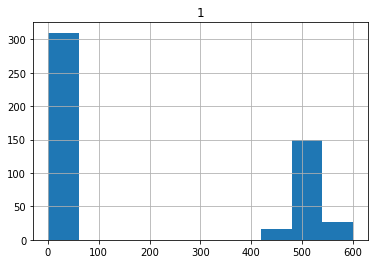

In [87]:
import pandas as pd
df = pd.DataFrame(counts.items())
df = df.sort_values(by=1, ascending=False)

df.hist()

In [88]:
print(df)

              0    1
133  0000111001  600
185  0101111000  583
188  0001101011  578
89   0110111110  574
43   0110111011  573
..          ...  ...
284  0000010010    1
194  0010111110    1
196  0101110100    1
62   0000010011    1
501  0010011111    1

[502 rows x 2 columns]


             0    1
133  000111001  600
185  101111000  583
188  001101011  578
89   110111110  574
43   110111011  573
..         ...  ...
195  101110001  471
222  101000111  471
122  011001001  470
286  101011110  467
37   101001001  464

[192 rows x 2 columns]


array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

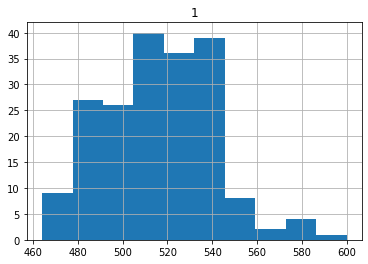

In [89]:
df1 = df.copy(deep = True)
df1[0] = df1[0].map(lambda x: x[1:])
df1 = df1[df1[1]>100]
print(df1)
df1.hist()

In [90]:
df.to_csv('thangu.csv')

Hence, the problem is solved